#Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [2]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [78]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('Fraud_check.csv')
# Display the first few rows of the dataset
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [4]:
# Display the first few rows of the dataset
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
# Summary statistics of the numerical columns
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
df.describe(include=object)

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.shape

(600, 6)

In [9]:
#finding duplicates
df.duplicated().sum()

0

In [10]:
#finding missing values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

# encodeng -coverting object data in to numeric column

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [16]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [17]:
df[cat_cols]

,Undergrad,Marital.Status,Urban
0,0.0,2.0,1.0
1,1.0,0.0,1.0
2,0.0,1.0,1.0
3,1.0,2.0,1.0
4,0.0,1.0,0.0
...,...,...,...
595,1.0,0.0,1.0
596,1.0,0.0,1.0
597,0.0,0.0,1.0
598,1.0,1.0,0.0


In [18]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


In [19]:
df.dtypes

Undergrad          float64
Marital.Status     float64
Taxable.Income       int64
City.Population      int64
Work.Experience      int64
Urban              float64
dtype: object

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

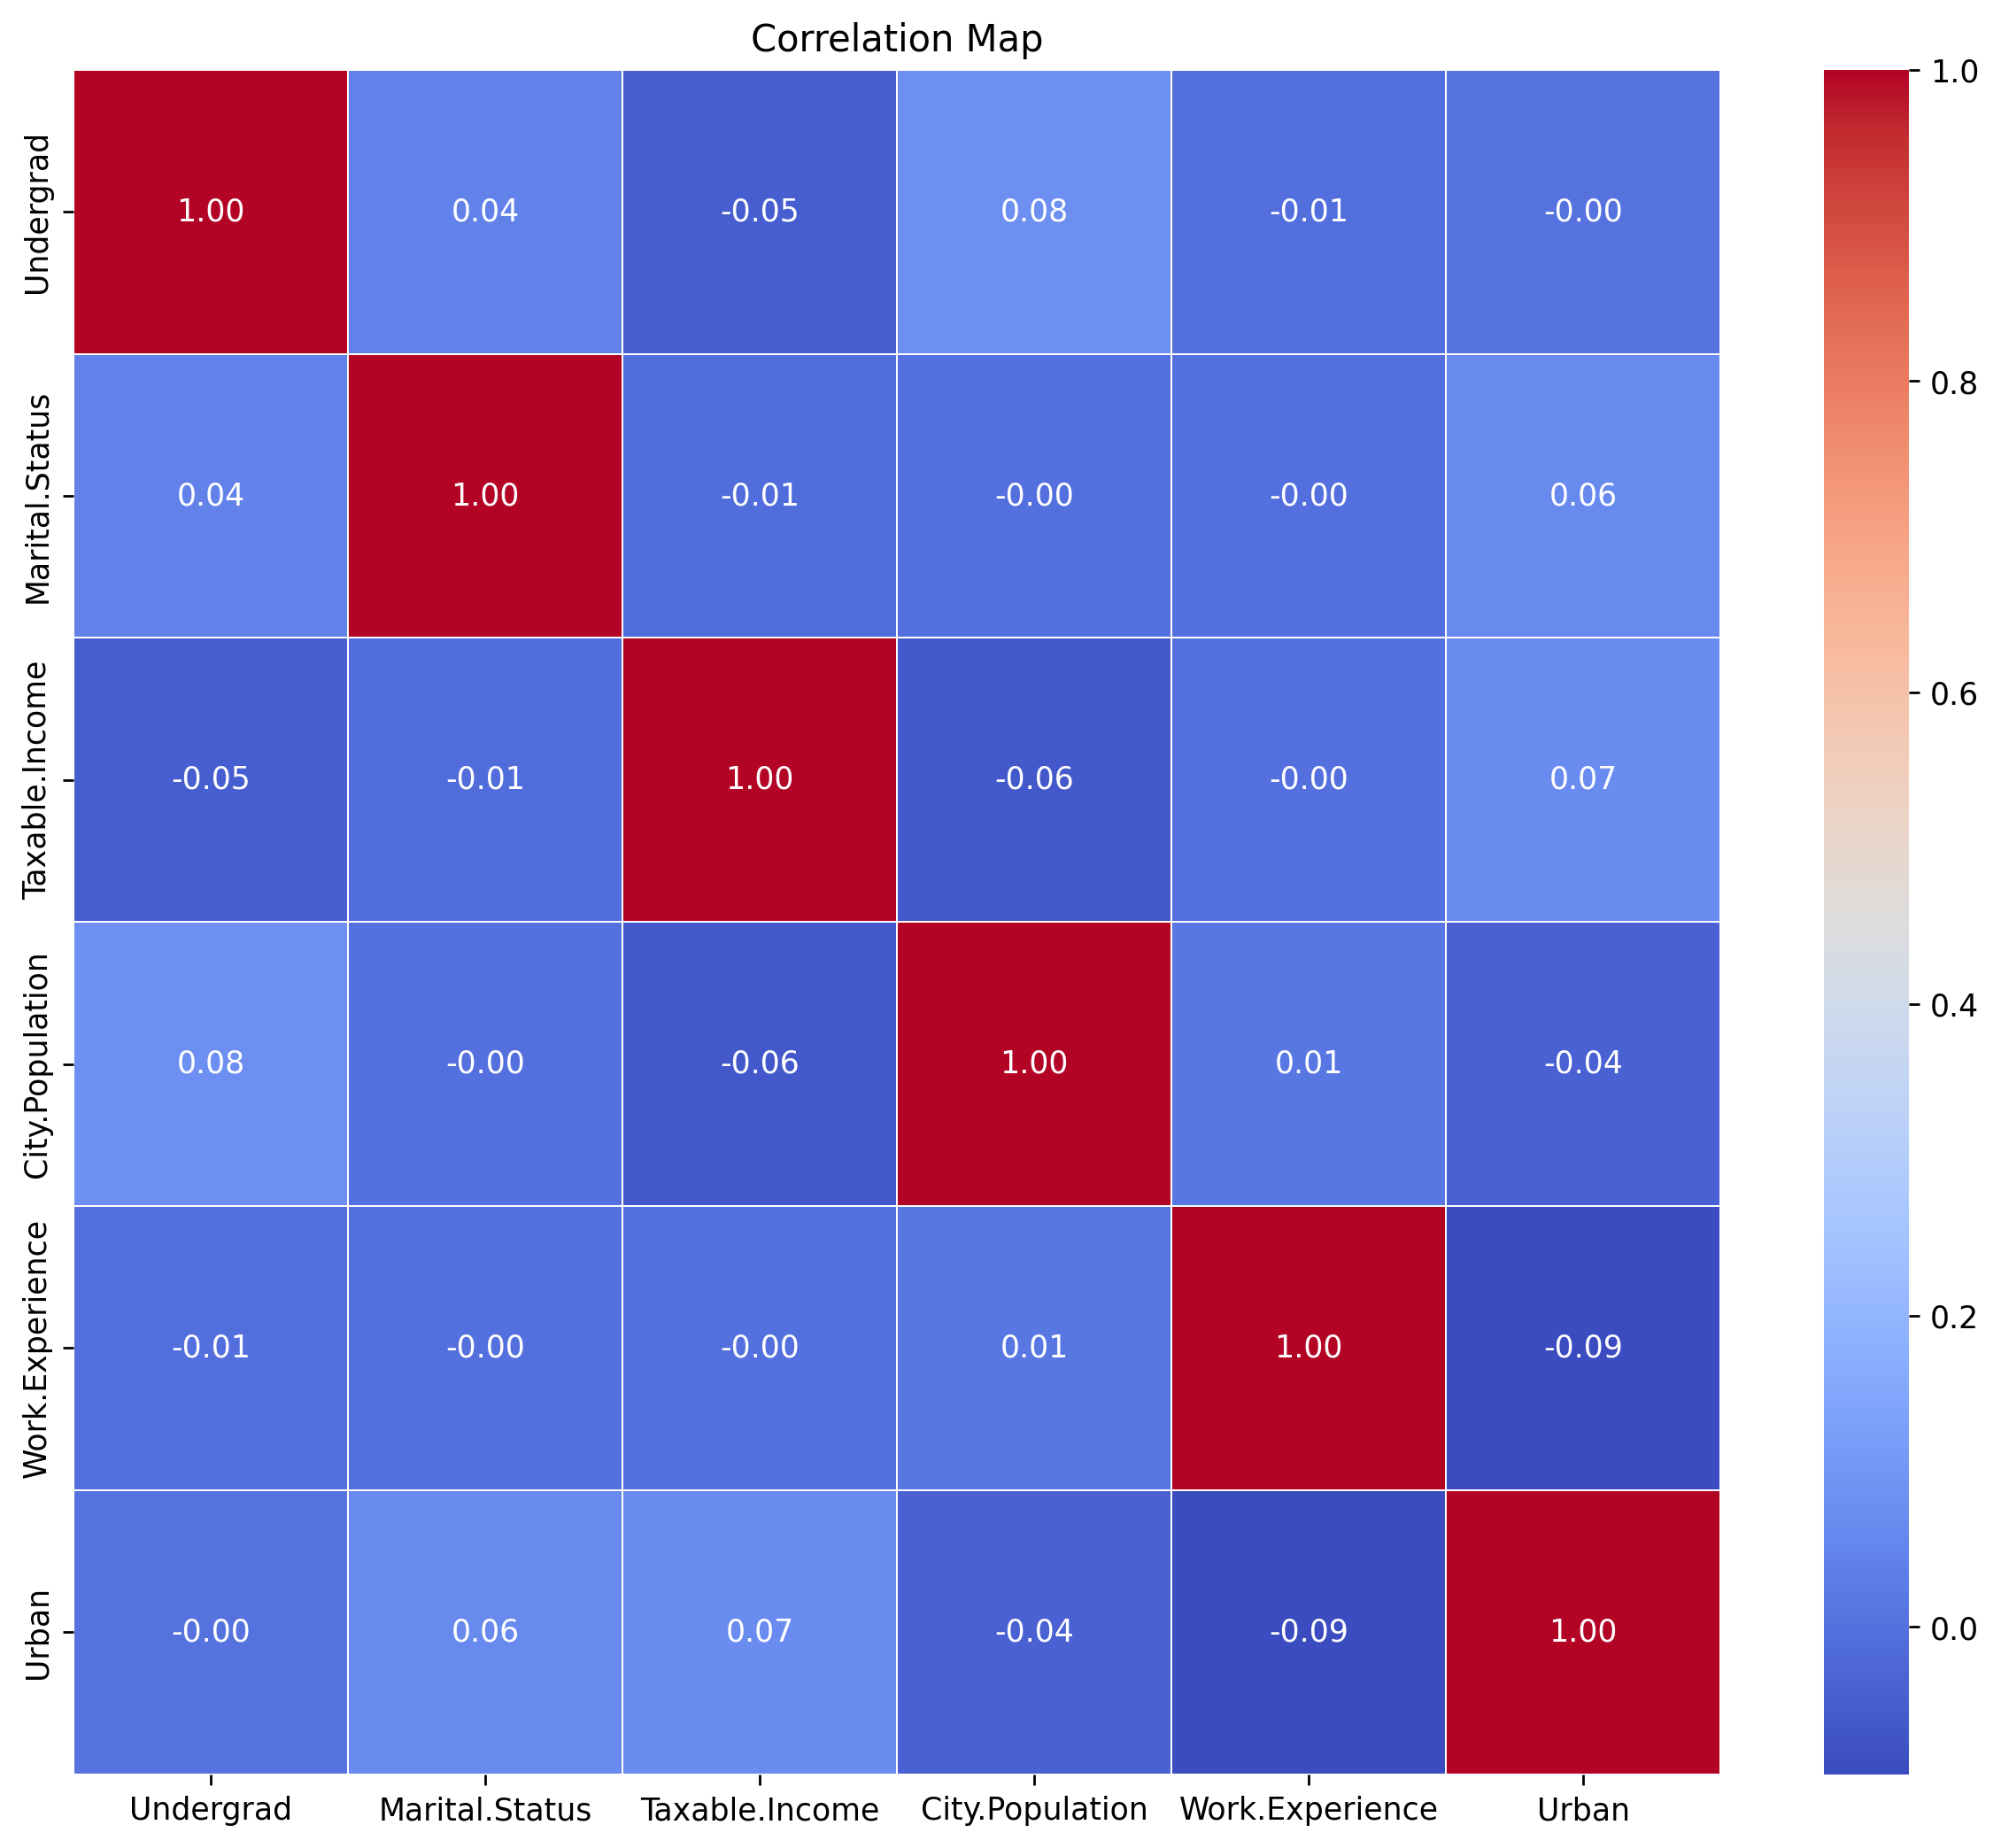

In [20]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

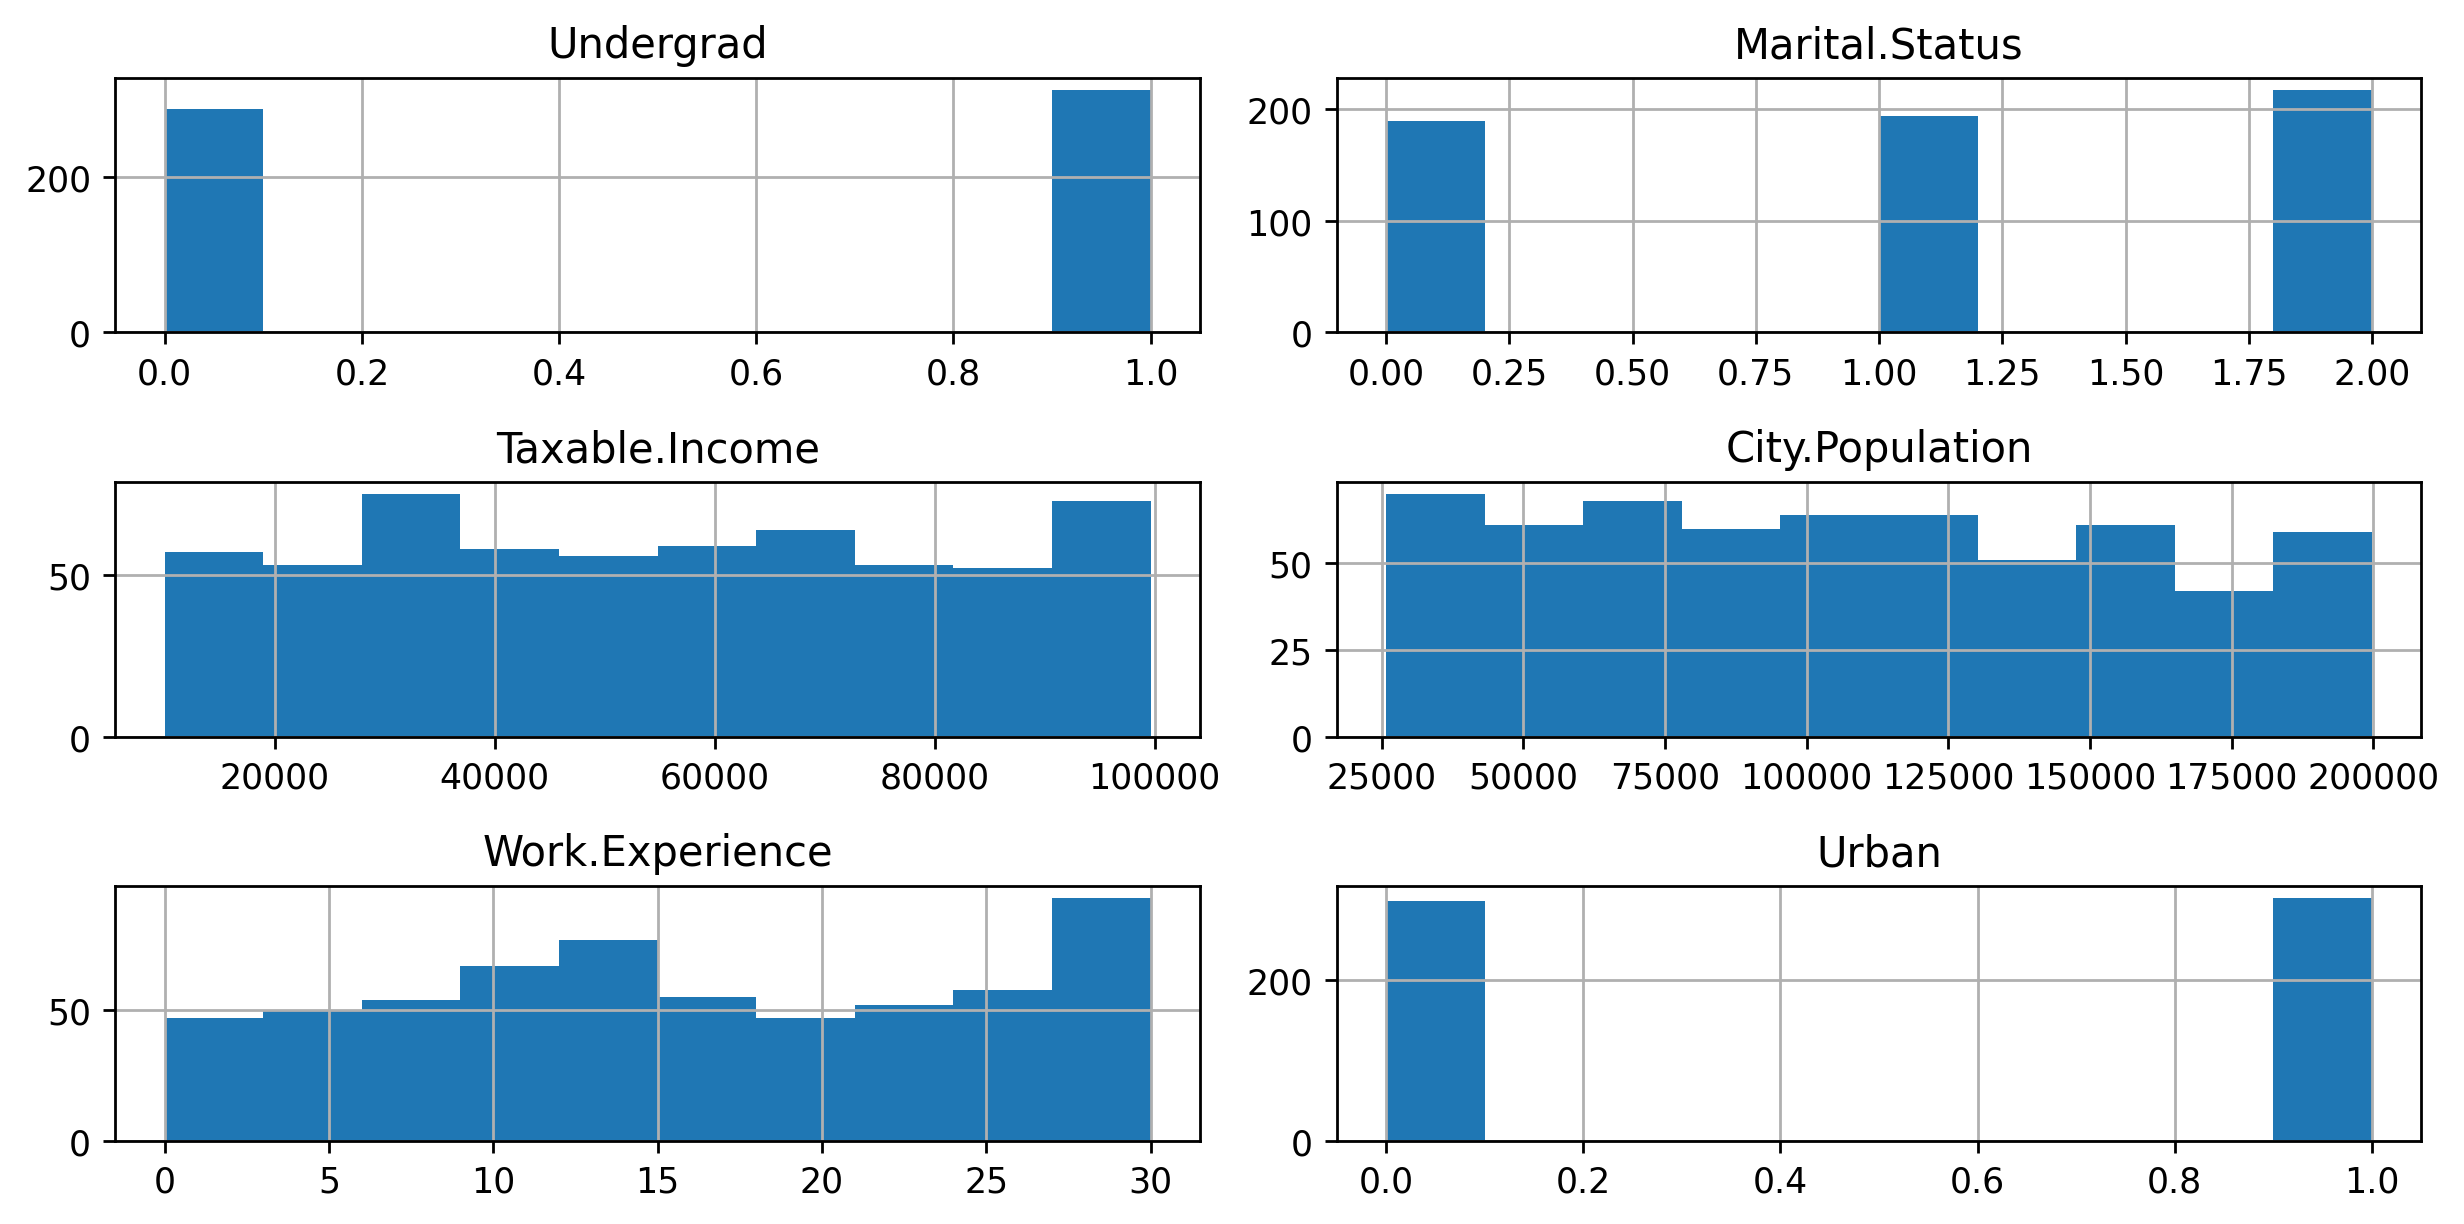

In [21]:
df.hist()
plt.tight_layout()

In [ ]:
#scatterplot to understand relatinship

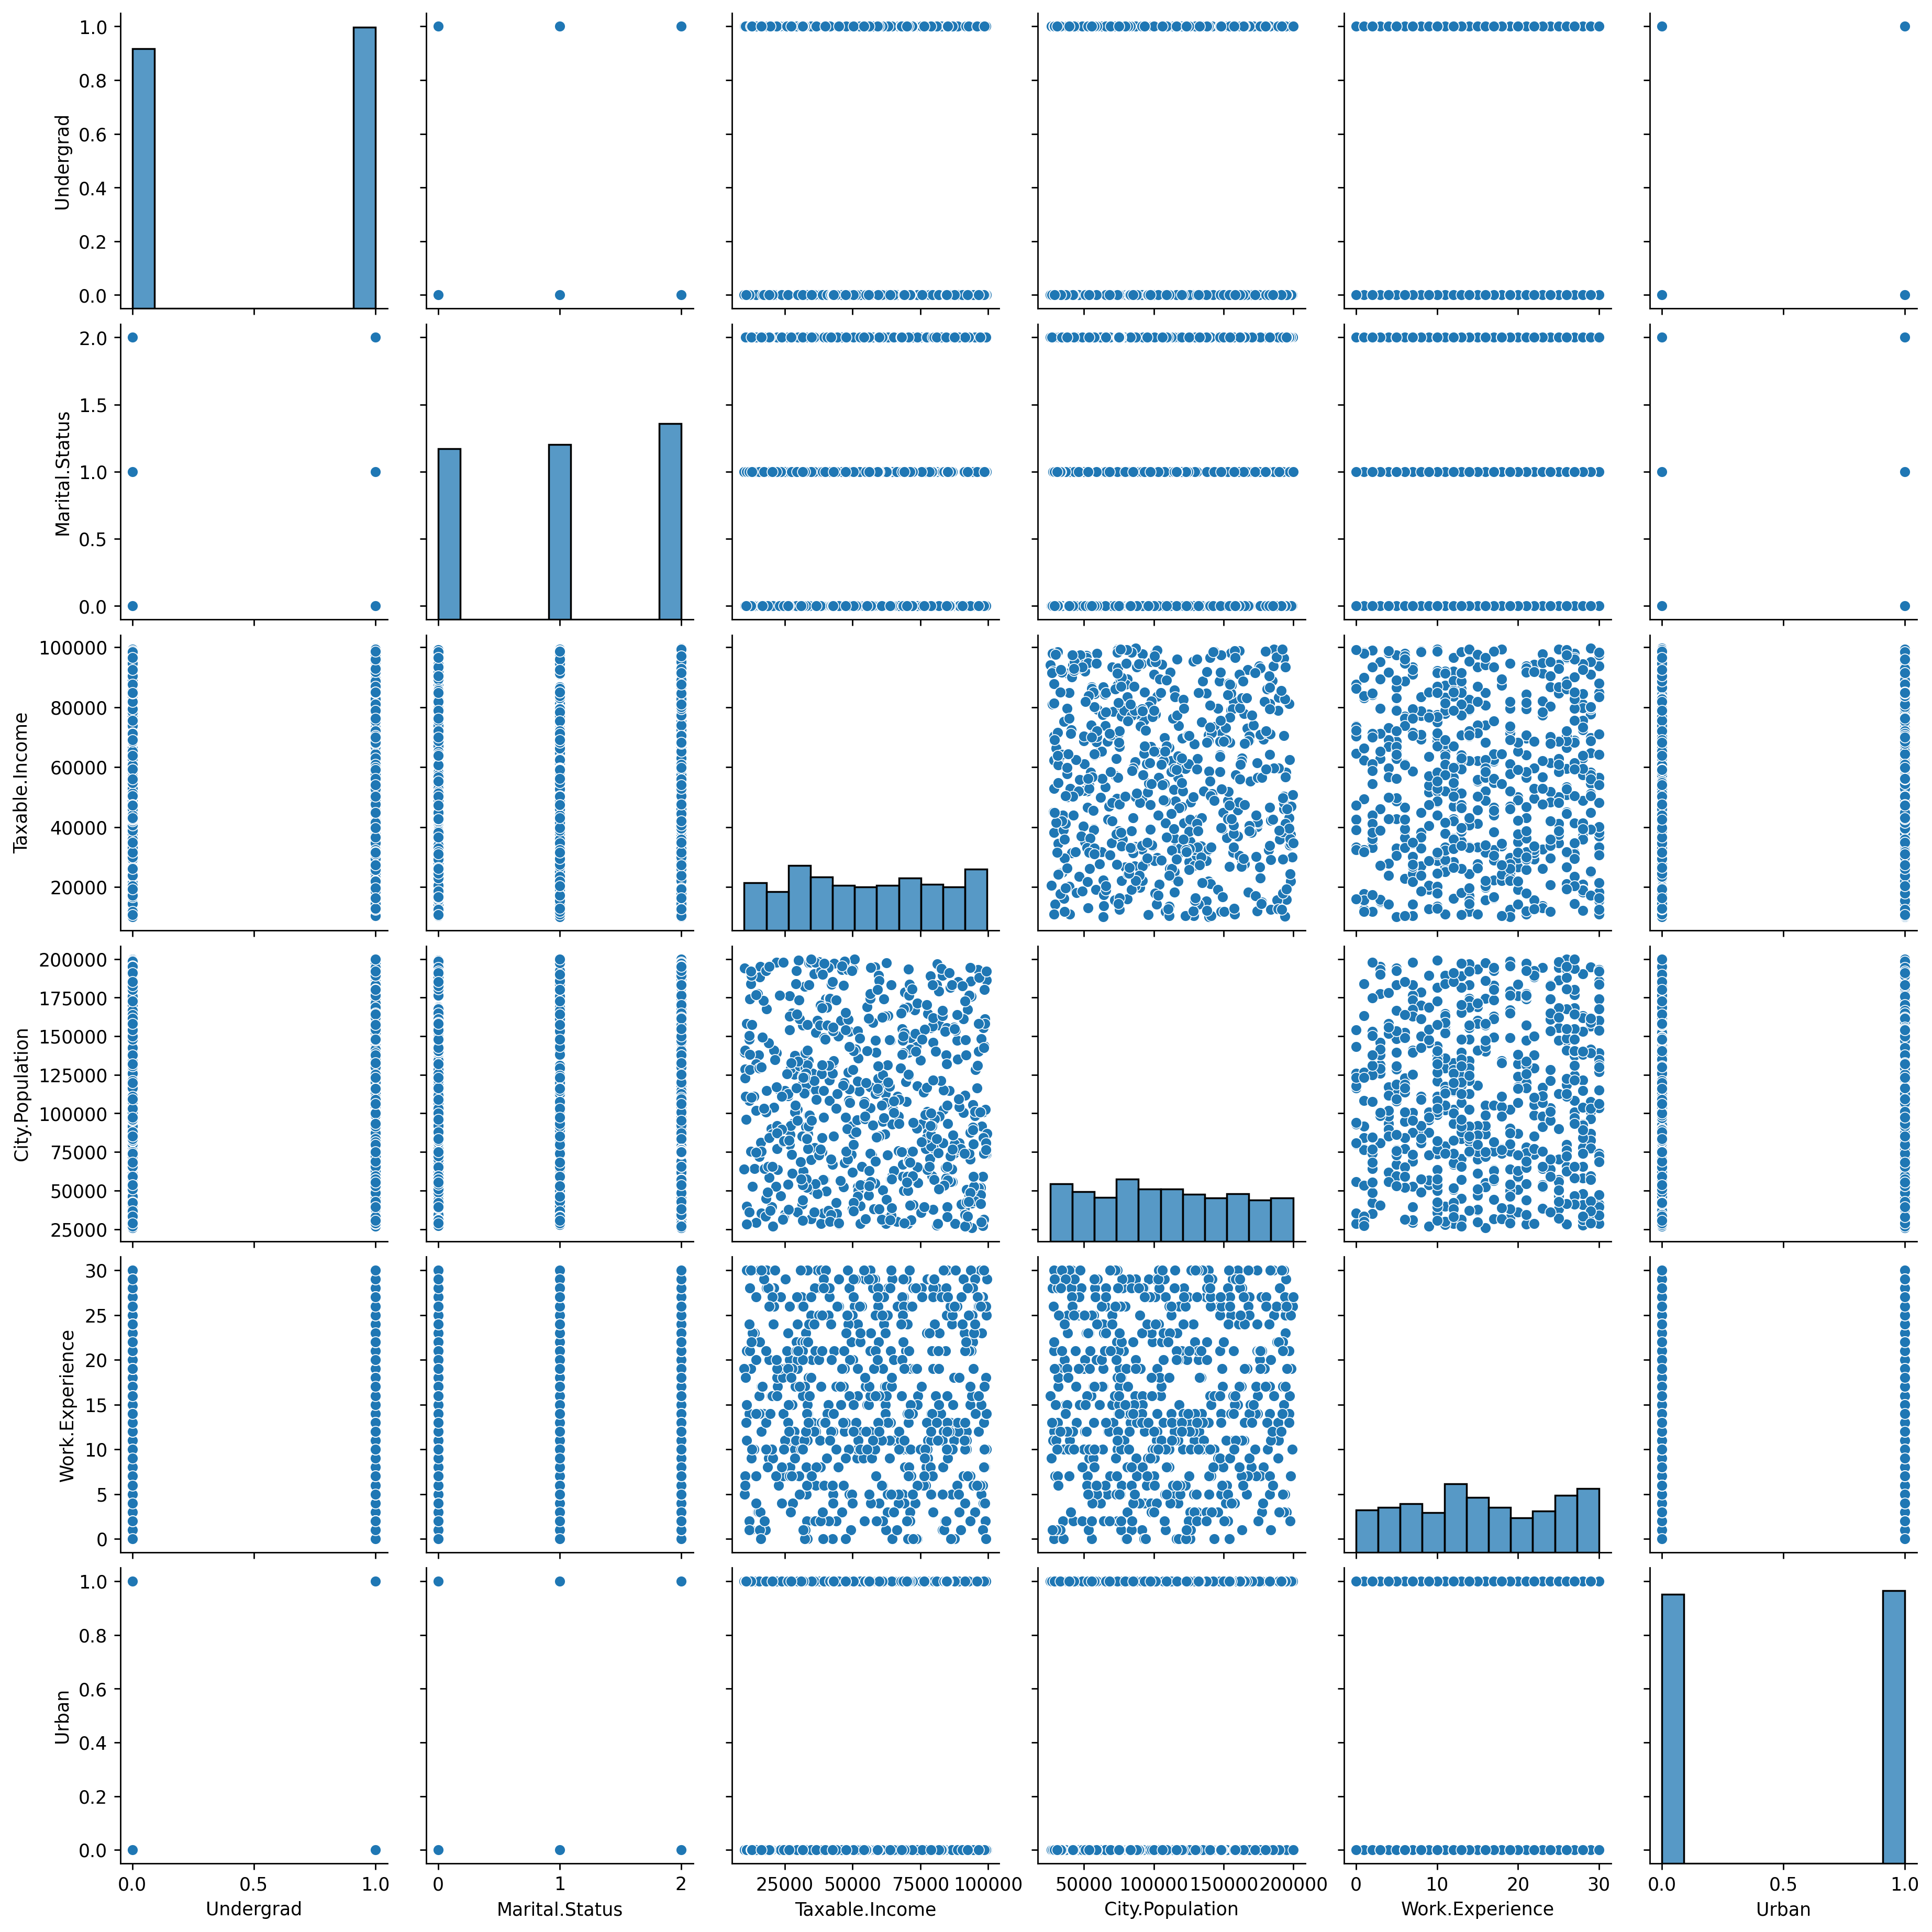

In [23]:
sns.pairplot(df)

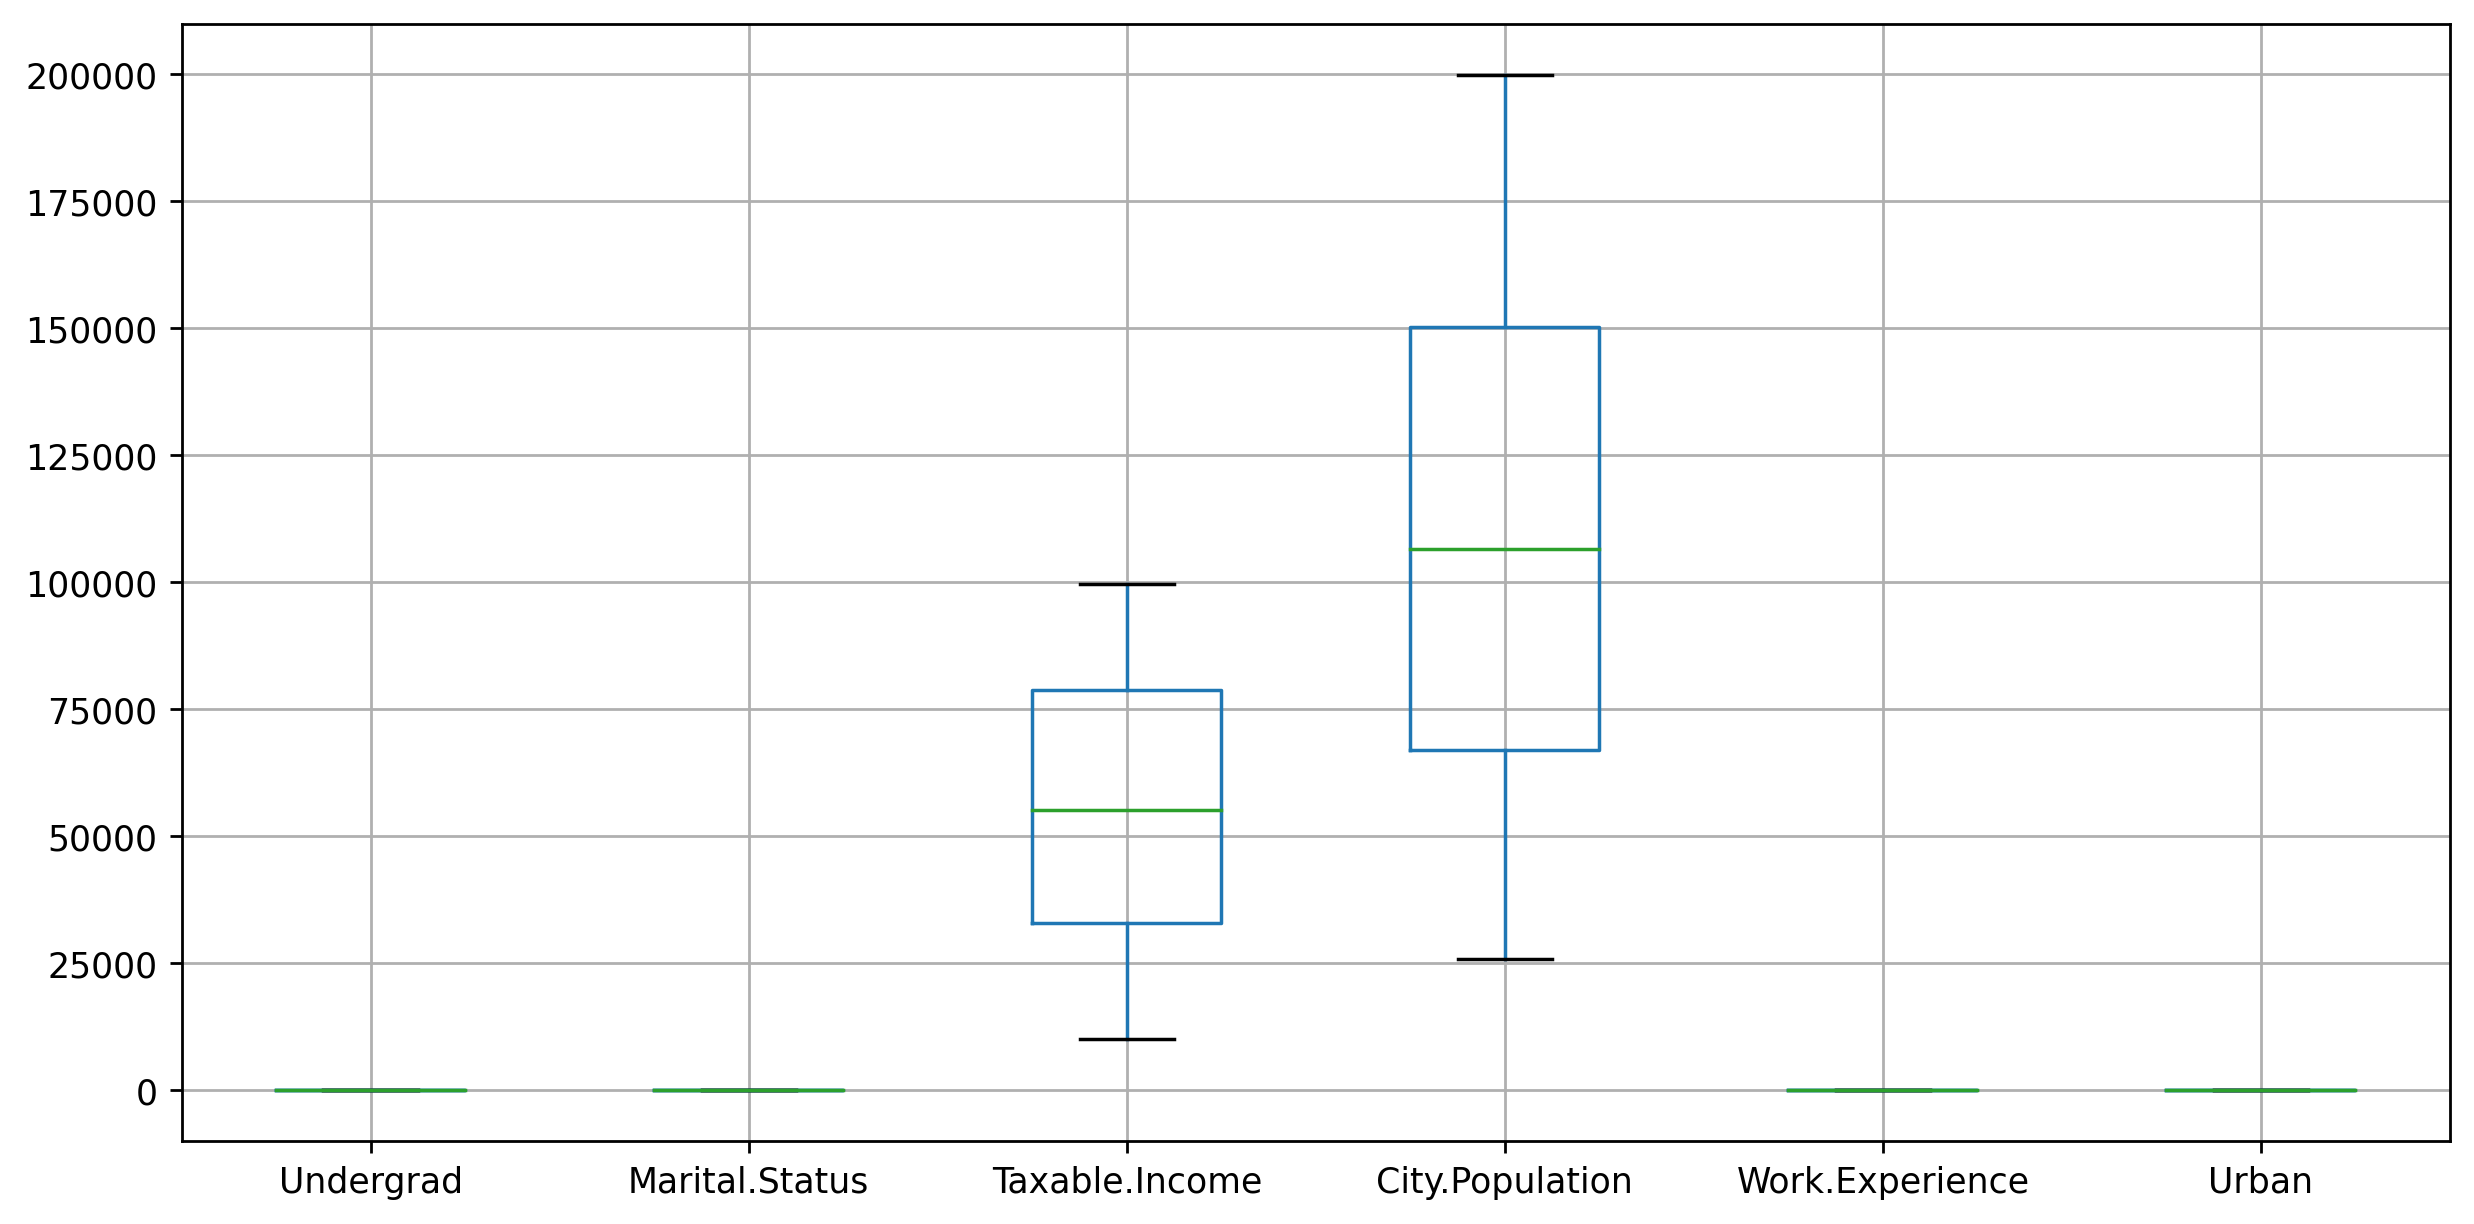

In [22]:
df.boxplot()
plt.tight_layout()

#Decision tree classification model

In [93]:
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming your columns are named as mentioned
X = df[['Undergrad', 'Marital.Status', 'Taxable.Income', 'Work.Experience', 'Urban']]
y = df['Taxable.Income']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Undergrad', 'Marital.Status', 'Urban'], drop_first=True)

# Convert Taxable.Income to binary labels: "Risky" and "Good"
y = ['Risky' if income <= 30000 else 'Good' for income in y]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier()
#Prune the Decision Tree model
model = DecisionTreeClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=2)
#Ensemble Methods
model = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=5, min_samples_leaf=2)
#Regularization
model = LogisticRegression(C=0.1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Make predictions on the test data
y_test_pred = model.predict(X_test)

In [98]:
# Assuming you have already trained a Logistic Regression model named 'logreg'
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)

Predictions: ['Risky' 'Good' 'Good' 'Risky' 'Good' 'Risky' 'Risky' 'Good' 'Good'
 'Risky' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Good'
 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Risky' 'Good' 'Good' 'Risky' 'Risky' 'Good' 'Good' 'Risky'
 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Risky' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Risky' 'Good' 'Good' 'Good'
 'Good' 'Risky' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Risky']


In [91]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00        94
       Risky       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [92]:
# Evaluate the model on training data
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {accuracy_train}")

# Evaluate the model on test data
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {accuracy_test}")

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Training Accuracy: 0.98125
Testing Accuracy: 0.95
Accuracy: 1.0


In [99]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross-validated Accuracy: 0.92 (+/- 0.09)
